In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [2]:
!pip install datasets
!pip install evaluate
! pip install -U accelerate
! pip install -U transformers
!pip install wandb

  Using cached evaluate-0.4.2-py3-none-any.whl.metadata (9.3 kB)
Using cached evaluate-0.4.2-py3-none-any.whl (84 kB)
  Using cached accelerate-0.33.0-py3-none-any.whl.metadata (18 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

In [ ]:
# SET GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "0"

In [ ]:
from datasets import load_dataset

train = load_dataset("psgomez/mix-data", encoding="Latin-1", split="train")
train



Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})

In [ ]:
datas = load_dataset("psgomez/mix-data", encoding="Latin-1",
     delimiter='\t',
     column_names=['label', 'text'],
     download_mode="force_redownload")
datas

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

**PREPROCESSING THE DATA**

In [ ]:
train = pd.DataFrame(datas['train'])
#Removing white spaces
train = train.replace(r'\n',' ', regex=True)
#Remove null values
train = train.dropna()
#Remove duplicate data
train = train.drop_duplicates()
#Removing commas and periods
import re

train['text'] = train['text'].replace(',','', regex=True)
train['text'] = train['text'].replace('\.',' ', regex=True)
train

,text,label
0,Lights don't work but battery heats up If I ...,0
1,May gasgas yung takip nung bote considering na...,0
2,Sana seller bago man lang denilever yung item ...,0
3,I really love it I Will definitely order agai...,1
4,May crack ang light at sira ang on/off button ...,0
...,...,...
9995,I ta-try ko pa yung Roll-Up anti-odor nila Th...,0
9996,Not safe for food prep Bought the brush to av...,0
9997,Fun Tradition Our family likes this movie We...,1
9998,Review Great product The different levels ar...,1


In [ ]:
train, test = train_test_split(train,test_size=0.2)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [ ]:
print("head")
display(train.head())
display(test.head())
print("info")
display(train.info())
display(test.info())
print("isnull")
display(train.isnull().sum())
display(test.isnull().sum())

head


,text,label
0,Good quality ang ganda ahahha malakas sya ang ...,1
1,Fire In Your Eyes Yes! This product offers...,1
2,Stops ejecting well After the first use they...,0
3,Kumpleto naman ang panget lang paladesisyon yu...,0
4,Maganda sya kaso walang bubble wrap mapapamura...,0


,text,label
0,Good and sturdy Haven't needed to use yet bu...,1
1,One Star battery only lasts 0-2 hours,0
2,Five Stars i loved it! it came in great condi...,1
3,Ngayon lng ako nagrate kasi tinesting ko pa H...,1
4,Wrong item di naman ganyan ung sa display pict...,0


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8000 non-null   object
 1   label   8000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 125.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

isnull


,0
text,0
label,0


,0
text,0
label,0


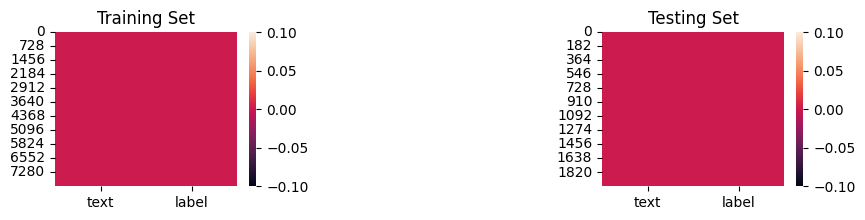

In [ ]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

train


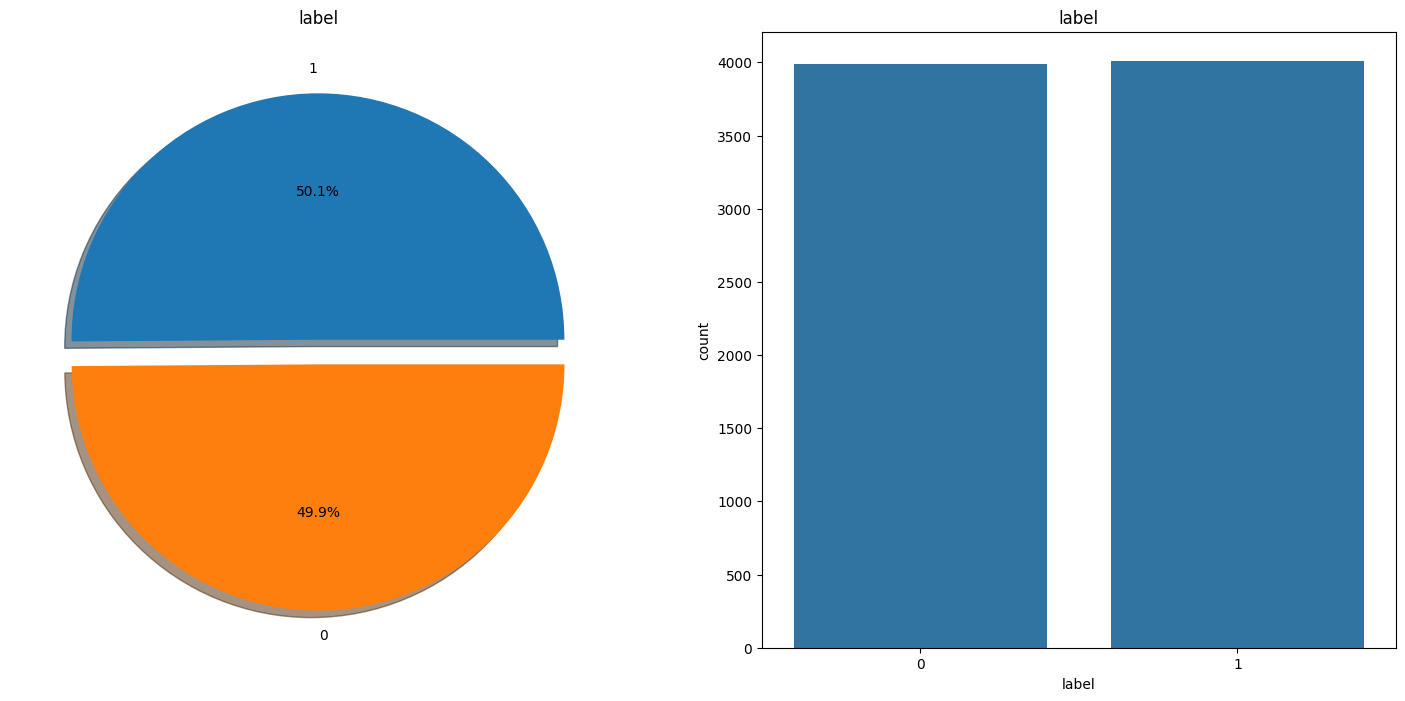

In [ ]:
print("train")
f,ax=plt.subplots(1,2,figsize=(18,8))
train["label"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot(x = train["label"],ax=ax[1])
ax[1].set_title('label')
plt.show()

test


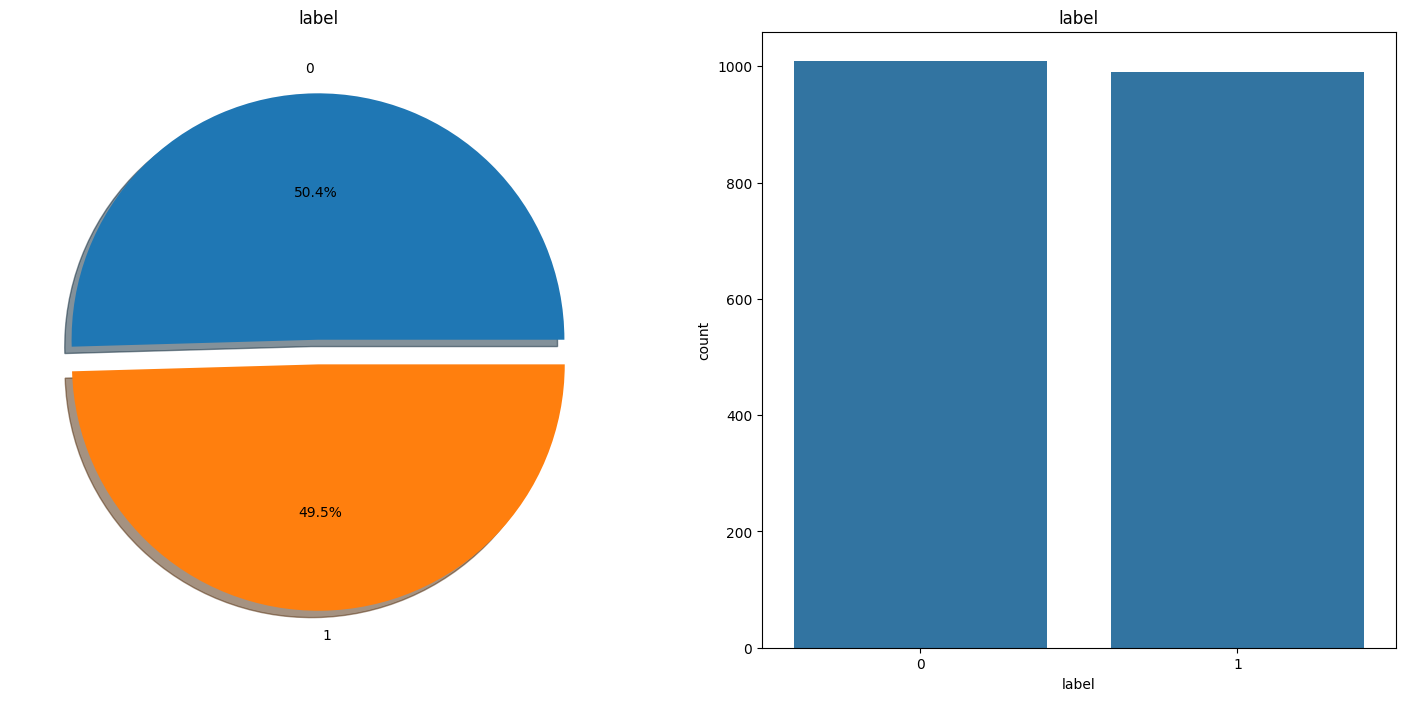

In [ ]:
print("test")
f,ax=plt.subplots(1,2,figsize=(18,8))
test["label"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot(x = test["label"],ax=ax[1])
ax[1].set_title('label')
plt.show()

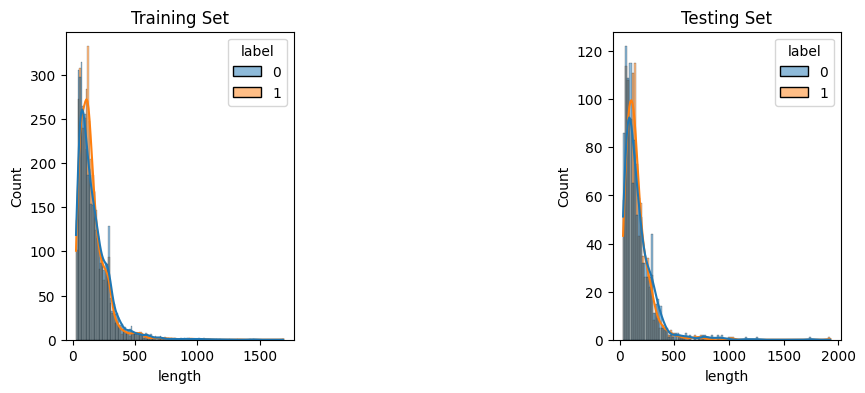

In [ ]:
train['length'] = train['text'].apply(len)
test['length'] = test['text'].apply(len)

plt.figure(figsize = (10, 4))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.histplot(train,x='length',hue='label',kde=True)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.histplot(test,x='length',hue='label',kde=True)
plt.show()

In [ ]:
label_count = train['label'].value_counts().sort_index()
label_count

,count
label,
0,3991
1,4009


In [ ]:
label_names = ['not', 'liked'] #SET 0/1 →'not', 'liked'
label_count.index = label_names
display(label_count)

fig = go.Figure([go.Bar(x=label_names, y=label_count, marker_color='skyblue')])

fig.update_layout(title_text='Number of entries per label', # title of plot
                  xaxis_title_text='Label', # xaxis label
                  yaxis_title_text='Count', # yaxis label
                  )
fig.show()

,count
not,3991
liked,4009


In [5]:
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer

In [ ]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
train.columns

Index(['text', 'label', 'length'], dtype='object')

In [ ]:
test.columns

Index(['text', 'label', 'length'], dtype='object')

In [ ]:
# delete unnecessary columns
train = train.drop(labels=['length'], axis=1)
test = test.drop(labels=['length'], axis=1)

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)


train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test)

ds = DatasetDict()
ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [ ]:
def tokenizer_sentence(data):
    return tokenizer(data['text'], truncation=True)  #feature columns

In [ ]:
tokenized_ds = ds.map(tokenizer_sentence, batched=True)

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 6400
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaModel

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits

In [ ]:
model = CustomXLMRobertaModel(num_labels=2)

Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric

batch_size = 16
training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=2,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                  learning_rate=1e-6,
                                  weight_decay=0.01,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "false"

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.405500,0.350246,0.880625,{'f1': 0.880625}
2,0.274500,0.282929,0.897500,{'f1': 0.8975}


TrainOutput(global_step=800, training_loss=0.46589469850063325, metrics={'train_runtime': 395.2705, 'train_samples_per_second': 32.383, 'train_steps_per_second': 2.024, 'total_flos': 0.0, 'train_loss': 0.46589469850063325, 'epoch': 2.0})

In [ ]:
#To get the training loss and validation loss in the trainer
train_loss = []
val_loss = []
ep = 1
for elem in trainer.state.log_history:
    if 'loss' in elem.keys() and ep in elem.values():
        train_loss.append(elem['loss'])

    if 'eval_loss' in elem.keys() and ep in elem.values():
        val_loss.append(elem['eval_loss'])
        ep += 1
val_loss

[0.35024550557136536, 0.2829285264015198]

In [ ]:
predictions = trainer.predict(tokenized_ds["test"])
predictions

PredictionOutput(predictions=array([[-0.5240915 , -0.09016021],
       [ 0.42917275, -1.1086462 ],
       [-1.1111776 ,  0.6569017 ],
       ...,
       [-0.56155986,  0.36952388],
       [-1.5761709 ,  1.413258  ],
       [-1.4367596 ,  1.4218702 ]], dtype=float32), label_ids=array([1, 0, 1, ..., 0, 0, 1]), metrics={'test_loss': 0.27218925952911377, 'test_accuracy': 0.903, 'test_f1': {'f1': 0.903}, 'test_runtime': 13.2199, 'test_samples_per_second': 151.287, 'test_steps_per_second': 9.455})

In [ ]:
logits = torch.from_numpy(predictions.predictions)
logits

tensor([[-0.5241, -0.0902],
        [ 0.4292, -1.1086],
        [-1.1112,  0.6569],
        ...,
        [-0.5616,  0.3695],
        [-1.5762,  1.4133],
        [-1.4368,  1.4219]])

In [ ]:
test_pred_df=pd.DataFrame(logits)
test_pred_df

,0,1
0,-0.524091,-0.090160
1,0.429173,-1.108646
2,-1.111178,0.656902
3,0.546226,-0.141263
4,1.191582,-1.643313
...,...,...
1995,0.992885,-1.921260
1996,-1.422258,1.100046
1997,-0.561560,0.369524
1998,-1.576171,1.413258


In [ ]:
test_pred_df=test_pred_df[0]
test_pred_df=pd.DataFrame(test_pred_df)
test_pred_df

,0
0,-0.524091
1,0.429173
2,-1.111178
3,0.546226
4,1.191582
...,...
1995,0.992885
1996,-1.422258
1997,-0.561560
1998,-1.576171


In [ ]:
test_pred_df[0][test_pred_df[0] <= 0] = 0
test_pred_df[0][test_pred_df[0] > 0] = 1
test_pred_df[0] = test_pred_df[0].replace({0:1,1:0}) #reverse

In [ ]:
test_pred_df=test_pred_df.set_axis(axis=1,labels=['Test_pred'])
test_pred_df

,Test_pred
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1995,0.0
1996,1.0
1997,1.0
1998,1.0


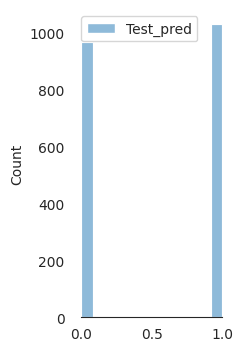

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(2, 4))
sns.histplot(test_pred_df)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
test_pred_all=test.merge(test_pred_df,how='inner',left_index=True,right_index=True)
test_pred_all

,text,label,Test_pred
0,Good and sturdy Haven't needed to use yet bu...,1,1.0
1,One Star battery only lasts 0-2 hours,0,0.0
2,Five Stars i loved it! it came in great condi...,1,1.0
3,Ngayon lng ako nagrate kasi tinesting ko pa H...,1,0.0
4,Wrong item di naman ganyan ung sa display pict...,0,0.0
...,...,...,...
1995,Sadly this did not work for my dogs or my ...,0,0.0
1996,Great quality and came early My daughter lov...,1,1.0
1997,Not for me very disappointed ?? needs a good n...,0,1.0
1998,d naman pla ganun ka lakas hahaix!expectations...,0,1.0


accuracy is: 90.400%


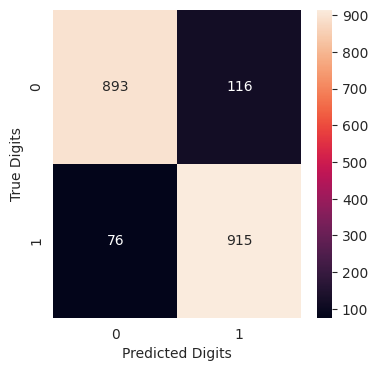

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(test_pred_all['label'], test_pred_all['Test_pred'])
print("accuracy is: {0:.3f}%".format(acc * 100))
cm = confusion_matrix(test_pred_all['label'] , test_pred_all['Test_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [ ]:
model = trainer.save_model("./my_model_again")


In [ ]:
config = model.config

AttributeError: 'CustomXLMRobertaModel' object has no attribute 'config'

In [ ]:
pip install huggingface_hub

In [4]:
pip install transformers

In [ ]:
print(model)

CustomXLMRobertaModel(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
  

In [ ]:
for name, param in model.named_parameters():
    print(name, param.size())

roberta.embeddings.word_embeddings.weight torch.Size([250002, 768])
roberta.embeddings.position_embeddings.weight torch.Size([514, 768])
roberta.embeddings.token_type_embeddings.weight torch.Size([1, 768])
roberta.embeddings.LayerNorm.weight torch.Size([768])
roberta.embeddings.LayerNorm.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.query.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.query.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.key.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.key.bias torch.Size([768])
roberta.encoder.layer.0.attention.self.value.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.self.value.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.dense.weight torch.Size([768, 768])
roberta.encoder.layer.0.attention.output.dense.bias torch.Size([768])
roberta.encoder.layer.0.attention.output.LayerNorm.weight torch.Size([768])
roberta.encoder.layer.0.attention.output

## **LOAD MODEL FROM HERE**

In [6]:
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer
# Load the tokenizer and model
model_name = "psgomez/xlm-roberta-fil-en"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, ignore_mismatched_sizes=True)



tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at psgomez/xlm-roberta-fil-en and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at psgomez/xlm-roberta-fil-en and are newly initialized because the shapes did not match:
- roberta.embeddings.token_type_embeddings.weight: found shape torch.Size([1, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**SINGLE INPUT**

In [7]:

inputs = tokenizer("High-quality material for maximum good safety Easy", return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
probabilities = torch.softmax(logits, dim=-1)

# Get the predicted class
predicted_class = torch.argmax(probabilities, dim=-1).item()
print(predicted_class)  # This will print the predicted class index

1


**MULTIPLE INPUTS**

In [33]:
def predict_sentiments(texts):
    # Tokenize the texts
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits and apply softmax to get probabilities
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=-1)

    # Get the predicted class for each text
    predicted_classes = torch.argmax(probabilities, dim=-1)

    return predicted_classes

# Example usage
texts = [
  "High-quality material for maximum good safety Easy",
    "Durable and long-lasting Protects both edges and corners Easy to install and remove Stylish design that blends with furniture",
    "Too small won't fit in the table edge !! ",
    "too small compare to what i saw in picture",
    "Di maganda Sobrang nipis Wala halos tela sa loob kaya walang naabsorb",
    "di masyado madikit natatangal sya not durable and hindi long lasting sayang lang haysbdhe",
    "maganda ang pagkakagawa",
    "Safe and waterproof design Energy-saving and cost-effective, Compact and portable design",
]

# Perform sentiment analysis for each text
for text in texts:
    sentiment_label = predict_sentiments(text)
    if sentiment_label == 1:
        print(f'"{text}" sentiment: Positive')
    else:
        print(f'"{text}" sentiment: Negative')

predictions = predict_sentiments(texts)
#print(predictions)  # This will print the predicted class indices for each text


"High-quality material for maximum good safety Easy" sentiment: Positive
"Durable and long-lasting Protects both edges and corners Easy to install and remove Stylish design that blends with furniture" sentiment: Positive
"Too small won't fit in the table edge !! " sentiment: Negative
"too small compare to what i saw in picture" sentiment: Negative
"Di maganda Sobrang nipis Wala halos tela sa loob kaya walang naabsorb" sentiment: Negative
"di masyado madikit natatangal sya not durable and hindi long lasting sayang lang haysbdhe" sentiment: Negative
"maganda ang pagkakagawa" sentiment: Positive
"Safe and waterproof design Energy-saving and cost-effective, Compact and portable design" sentiment: Positive
"the sentiment is happy" sentiment: Positive


In [ ]:
# Define the sentiment analysis pipeline
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Function to predict sentiment
def predict_sentiment(text):
    result = classifier(text)
    label = result[0]['label']
    return label

In [ ]:
# Function to predict sentiment
def predict_sentiment(text):
    result = classifier(text)
    label = result[0]['label']
    return label

**JSON FILE**

In [ ]:
import json

config = {
    "model_type": "xlm-roberta",
    "hidden_size": 768,
    "num_attention_heads": 12,
    "num_hidden_layers": 12,
    "vocab_size": 250002,
    "max_position_embeddings": 514,
    "layer_norm_eps": 1e-05,
    "initializer_range": 0.02,
    "dropout_prob": 0.1,
    "classifier_hidden_size": 512,
    "num_labels": 2,
    "pooler_dense_size": 768,
    "activation_function": "ReLU",
    "custom_classifier_layers": [
        {
            "layer_type": "Linear",
            "in_features": 768,
            "out_features": 512
        },
        {
            "layer_type": "LayerNorm",
            "normalized_shape": 512,
            "eps": 1e-05
        },
        {
            "layer_type": "ReLU"
        },
        {
            "layer_type": "Dropout",
            "p": 0.1
        },
        {
            "layer_type": "Linear",
            "in_features": 512,
            "out_features": 2
        }
    ],
    "loss_function": "CrossEntropyLoss"
}

# Save as config.json
with open('./my_model_again/config.json', 'w') as f:
    json.dump(config, f, indent=4)